Importamos librerías

In [1]:
import pandas as pd
import io
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
import sys
import time
import json
from IPython.display import display
from time import strftime, gmtime
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statistics as st

# styling
pd.set_option('display.max_columns',150)
plt.style.use('bmh')
from IPython.display import display



In [2]:
path = r"C:\Users\slopezgu\OneDrive - Capgemini\Desktop\Survey\responses.csv"
df = pd.read_csv(path, encoding='latin-1', on_bad_lines='skip', engine = 'python', delimiter=",")
print(df.shape)
df.head()

(1010, 150)


,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Smoking,Alcohol,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Punctuality,Lying,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Internet usage,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,3.0,1.0,1.0,1.0,1.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,5.0,5.0,3.0,1.0,2.0,1.0,5.0,1.0,3.0,3.0,5.0,3.0,5.0,3.0,3.0,3.0,3.0,5.0,3.0,1.0,1.0,1.0,1.0,5.0,3.0,3.0,2.0,1.0,5.0,5.0,1.0,4.0,4.0,2.0,5.0,4.0,4.0,1.0,1.0,1.0,1.0,1.0,5,3.0,1.0,3.0,2.0,never smoked,drink a lot,4.0,2.0,2.0,5.0,4.0,2.0,5.0,4.0,4.0,1.0,3.0,5.0,1.0,1.0,3.0,4.0,1.0,3.0,1.0,3.0,1,4.0,5.0,4.0,3.0,2.0,1.0,1.0,1.0,4,2.0,3,i am always on time,never,3.0,4.0,3.0,4.0,3.0,4.0,3.0,5.0,1.0,1.0,3.0,5.0,5.0,1.0,4.0,5.0,1.0,4.0,3.0,2.0,3.0,4.0,3.0,few hours a day,3.0,4.0,5.0,3.0,3.0,1,3.0,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,4.0,1.0,3.0,1.0,4.0,4.0,2.0,1.0,1.0,5.0,2.0,2.0,4.0,3.0,4.0,1.0,3.0,5.0,4.0,1.0,4.0,1.0,3.0,4.0,5.0,2.0,4.0,4.0,5.0,1.0,1.0,4.0,4.0,5.0,1.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,3.0,2.0,4.0,2.0,5.0,1.0,1.0,1.0,2.0,1.0,1,1.0,3.0,1.0,4.0,never smoked,drink a lot,3.0,3.0,2.0,4.0,5.0,4.0,1.0,4.0,4.0,3.0,4.0,3.0,2.0,1.0,2.0,5.0,4.0,4.0,1.0,2.0,1,2.0,4.0,3.0,2.0,4.0,4.0,4.0,1.0,3,1.0,3,i am often early,sometimes,3.0,4.0,4.0,4.0,4.0,2.0,4.0,2.0,2.0,5.0,4.0,4.0,4.0,1.0,4.0,3.0,5.0,3.0,4.0,5.0,3.0,2.0,3.0,few hours a day,3.0,4.0,1.0,4.0,2.0,5,2.0,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,4.0,1.0,4.0,3.0,5.0,5.0,5.0,1.0,3.0,5.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,5.0,2.0,2.0,1.0,1.0,2.0,1.0,5.0,2.0,4.0,2.0,4.0,1.0,1.0,5.0,2.0,5.0,2.0,3.0,1.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,2.0,1.0,1.0,4.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0,1,1.0,1.0,1.0,2.0,tried smoking,drink a lot,3.0,1.0,2.0,5.0,3.0,5.0,3.0,4.0,5.0,1.0,5.0,2.0,4.0,1.0,3.0,5.0,4.0,4.0,1.0,5.0,5,5.0,4.0,2.0,5.0,3.0,2.0,5.0,5.0,1,3.0,3,i am often running late,sometimes,2.0,3.0,4.0,3.0,5.0,3.0,4.0,4.0,3.0,4.0,3.0,2.0,4.0,4.0,4.0,4.0,3.0,3.0,3.0,4.0,5.0,3.0,1.0,few hours a day,2.0,4.0,1.0,4.0,3.0,4,2.0,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,4.0,2.0

In [3]:
df.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska","Swing, Jazz",Rock n roll,Alternative,Latino,"Techno, Trance",Opera,Movies,Horror,Thriller,Comedy,Romantic,Sci-fi,War,Fantasy/Fairy tales,Animated,Documentary,Western,Action,History,Psychology,Politics,Mathematics,Physics,Internet,PC,Economy Management,Biology,Chemistry,Reading,Geography,Foreign languages,Medicine,Law,Cars,Art exhibitions,Religion,"Countryside, outdoors",Dancing,Musical instruments,Writing,Passive sport,Active sport,Gardening,Celebrities,Shopping,Science and technology,Theatre,Fun with friends,Adrenaline sports,Pets,Flying,Storm,Darkness,Heights,Spiders,Snakes,Rats,Ageing,Dangerous dogs,Fear of public speaking,Healthy eating,Daily events,Prioritising workload,Writing notes,Workaholism,Thinking ahead,Final judgement,Reliability,Keeping promises,Loss of interest,Friends versus money,Funniness,Fake,Criminal damage,Decision making,Elections,Self-criticism,Judgment calls,Hypochondria,Empathy,Eating to survive,Giving,Compassion to animals,Borrowed stuff,Loneliness,Cheating in school,Health,Changing the past,God,Dreams,Charity,Number of friends,Waiting,New environment,Mood swings,Appearence and gestures,Socializing,Achievements,Responding to a serious letter,Children,Assertiveness,Getting angry,Knowing the right people,Public speaking,Unpopularity,Life struggles,Happiness in life,Energy levels,Small - big dogs,Personality,Finding lost valuables,Getting up,Interests or hobbies,Parents' advice,Questionnaires or polls,Finances,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,1002.000000,1006.000000,1003.000000,1004.000000,1003.000000,1003.000000,1002.000000,1003.000000,1009.000000,1004.000000,1008.000000,1009.000000,1007.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1002.000000,1006.000000,1008.000000,1008.000000,1005.000000,1009.000000,1007.000000,1007.000000,1006.000000,1004.000000,1005.000000,1004.000000,1000.000000,1004.000000,1001.000000,1005.000000,1005.000000,1009.000000,1006.000000,1004.000000,1007.000000,1003.000000,1007.000000,1009.000000,1004.000000,995.000000,1006.000000,1003.000000,1008.000000,1008.000000,1004.000000,1002.000000,1006.000000,1007.000000,1006.00000,1007.000000,1009.000000,1008.000000,1007.000000,1005.000000,1010.000000,1007.000000,1009.000000,1009.000000,1009.000000,1007.000000,1003.000000,1005.000000,1007.000000,1005.000000,1007.000000,1003.000000,1006.000000,1009.000000,1006.000000,1004.000000,1006.000000,1009.000000,1003.000000,1006.000000,1007.000000,1005.000000,1006.000000,1006.000000,1005.000000,1010.000000,1004.000000,1003.000000,1008.000000,1009.000000,1006.000000,1009.000000,1008.000000,1008.000000,1010.000000,1007.000000,1010.000000,1007.000000,1008.000000,1006.000000,1007.000000,1005.000000,1008.000000,1004.000000,1006.000000,1008.000000,1006.000000,1008.000000,1008.000000,1007.000000,1007.000000,1006.000000,1005.000000,1006.000000,1006.000000,1006.000000,1005.000000,1007.000000,1008.000000,1006.000000,1007.000000,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,2.456088,2.910537,2.769691,2.759960,3.141575,2.828514,2.842315,2.338983,2.139742,4.613546,2.793651,3.383548,4.494538,3.489573,3.113095,3.155754,3.749752,3.788481,3.643713,2.126243,3.536706,3.207341,3.138308,2.595639,2.334657,2.064548,4.175944,3.136454,2.643781,2.665339,2.165000,3.159363,3.082917,3.778109,2.516418,2.256690,2.686879,2.589641,2.273088,3.686939,2.461768,2.324083,1.901394,3.387940,3.291252,1.907278,2.362103,3.276786,3.234064,3.024950,4.557654,2.948361,3.33499,2.061569

In [9]:
mean = df.mean()
high_mean = mean[mean > 4]
high_mean = high_mean[mean < 5]

print('Those are the most liked things:')
print(high_mean)

Those are the most liked things:
Music               4.731877
Movies              4.613546
Comedy              4.494538
Internet            4.175944
Fun with friends    4.557654
Borrowed stuff      4.017857
dtype: float64


C:\Users\slopezgu\AppData\Local\Temp\ipykernel_4756\2176806731.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


In [10]:

pathinfo = r"C:\Users\slopezgu\OneDrive - Capgemini\Desktop\Survey\columns.csv"
info = pd.read_csv(pathinfo, encoding='latin-1', on_bad_lines='skip', engine = 'python', delimiter=",")
column_types = df.dtypes
info = pd.merge(column_types.rename('type'), info, left_index=True, right_on='short')
info.head(20)

,type,original,short
0,float64,I enjoy listening to music.,Music
1,float64,I prefer.,Slow songs or fast songs
2,float64,"Dance, Disco, Funk",Dance
3,float64,Folk music,Folk
4,float64,Country,Country
5,float64,Classical,Classical music
6,float64,Musicals,Musical
7,float64,Pop,Pop
8,float64,Rock,Rock
9,float64,"Metal, Hard rock",Metal or Hardrock


In [11]:
info.loc[info.short == 'Music']

,type,original,short
0,float64,I enjoy listening to music.,Music


Aquí creamos una función que me permite recuperar con facilidad información sobre la variable

In [12]:
def display_row(short):
  # Get the row from the table that matches the given 'short' column name.
  row = info.loc[info['short'] == short]
  print(row)

In [13]:
display_row('Borrowed stuff')

       type                                          original           short
98  float64  I look after things I have borrowed from others.  Borrowed stuff


Clasifiquemos cada pregunta según su tipo, para facilitar el análisis posterior

In [14]:
music_col = ['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country',
       'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera' ]
movies_col = ['Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action']
hobbies_col = ['History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets']
phobias_col = ['Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking']
health_col = ['Smoking', 'Alcohol', 'Healthy eating']
personality_col = ['Daily events', 'Prioritising workload', 'Writing notes', 'Workaholism', 'Thinking ahead', 'Final judgement', 'Reliability', 'Keeping promises', 'Loss of interest', 'Friends versus money', 'Funniness', 'Fake', 'Criminal damage', 'Decision making', 'Elections', 'Self-criticism', 'Judgment calls', 'Hypochondria', 'Empathy', 'Eating to survive', 'Giving', 'Compassion to animals', 'Borrowed stuff', 'Loneliness', 'Cheating in school', 'Health', 'Changing the past', 'God', 'Dreams', 'Charity', 'Number of friends', 'Punctuality', 'Lying', 'Waiting', 'New environment', 'Mood swings', 'Appearence and gestures', 'Socializing', 'Achievements', 'Responding to a serious letter', 'Children', 'Assertiveness', 'Getting angry', 'Knowing the right people', 'Public speaking', 'Unpopularity', 'Life struggles', 'Happiness in life', 'Energy levels', 'Small - big dogs', 'Personality', 'Finding lost valuables', 'Getting up', 'Interests or hobbies', "Parents' advice", 'Questionnaires or polls', 'Internet usage', 'Finances']
personality_col1 = ['Criminal damage', 'Decision making', 'Elections', 'Self-criticism', 'Judgment calls', 'Hypochondria', 'Empathy', 'Eating to survive', 'Giving', 'Compassion to animals', 'Borrowed stuff', 'Loneliness']
personality_col2 = ['Daily events', 'Prioritising workload', 'Writing notes', 'Workaholism', 'Thinking ahead', 'Final judgement', 'Reliability', 'Keeping promises', 'Loss of interest', 'Friends versus money', 'Funniness', 'Fake']
personality_col3 = ['Cheating in school', 'Health', 'Changing the past', 'God', 'Dreams', 'Charity', 'Number of friends', 'Punctuality', 'Lying', 'Waiting', 'New environment', 'Mood swings']
personality_col4 = ['Appearence and gestures', 'Socializing', 'Achievements', 'Responding to a serious letter', 'Children', 'Assertiveness', 'Getting angry', 'Knowing the right people', 'Public speaking', 'Unpopularity', 'Life struggles', 'Happiness in life']
personality_col5 = ['Energy levels', 'Small - big dogs', 'Personality', 'Finding lost valuables', 'Getting up', 'Interests or hobbies', "Parents' advice", 'Questionnaires or polls', 'Internet usage']

spending_col = ['Finances', 'Shopping centres', 'Branded clothing', 'Entertainment spending', 'Spending on looks', 'Spending on gadgets', 'Spending on healthy eating']
demo_col = ['Age', 'Height', 'Weight', 'Number of siblings', 'Gender', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']
list_by_topics = [music_col, movies_col, hobbies_col, phobias_col, health_col, personality_col, demo_col]

Chequeamos los nulls y su distribución

In [15]:
nulls = pd.DataFrame(df[df.columns[df.isnull().any()]].isnull().sum())
nulls['Percentage'] = df[df.columns[df.isnull().any()]].isnull().sum() / df.shape[0]
nulls = nulls.rename(columns={0: 'nulls'})
nulls.value_counts().sort_index()


nulls  Percentage
1      0.000990      14
2      0.001980      25
3      0.002970      29
4      0.003960      25
5      0.004950      15
6      0.005941      14
7      0.006931      12
8      0.007921       5
9      0.008911       1
10     0.009901       1
15     0.014851       1
20     0.019802       2
dtype: int64

Cómo podemos ver, parecen existir pocos nulos. Veamos en qué variables son las que más nulos encontramos

In [16]:
nulls.loc[nulls.Percentage > 0.01]

,nulls,Percentage
Passive sport,15,0.014851
Height,20,0.019802
Weight,20,0.019802


Vemos como Peso y Altura son las dos respuestas que más veces se han dejado en blanco. Una teoría podría ser que las mujeres tienden a responder menos sobre su peso, mientras que los hombres menos sobre su altura, ya que son dos variables que pueden ser consideradas íntimas

In [17]:
dfFem = df[df['Gender'] == 'female']
dfmale = df[df['Gender'] == 'male']
print('Number of girls: {:.0f}'.format(len(dfFem.index)))
print('Number of boys: {:.0f}'.format(len(dfmale.index)))
print('Percentage of girls more than boys: {:.2f}'.format((len(dfFem.index)) / (len(dfmale.index)) -1))
print('Number of girls who omitted weight field: {:.0f}'.format(df[df['Gender'] == 'female']['Weight'].isnull().sum()))
print('Number of boys who omitted weight field: {:.0f}'.format(df[df['Gender'] == 'male']['Weight'].isnull().sum()))
print('Number of girls who omitted height field: {:.0f}'.format(df[df['Gender'] == 'female']['Height'].isnull().sum()))
print('Number of boys who omitted height field: {:.0f}'.format(df[df['Gender'] == 'male']['Height'].isnull().sum()))

Number of girls: 593
Number of boys: 411
Percentage of girls more than boys: 0.44
Number of girls who omitted weight field: 13
Number of boys who omitted weight field: 6
Number of girls who omitted height field: 13
Number of boys who omitted height field: 6


Podemos ver que hay un porcentage significativamente superior de mujeres que de hombres.

También podemos ver como se confirma nuestra hipótesis de que las mujeres reponden menos a cuestiones de peso. Sin embargo, también responden menos a la altura, por lo que no se cumple la hipótesis respecto a la altura de los hombres

Comprobemos como de balanceada es nuestra muestra en función de otros datos sociodemográficos

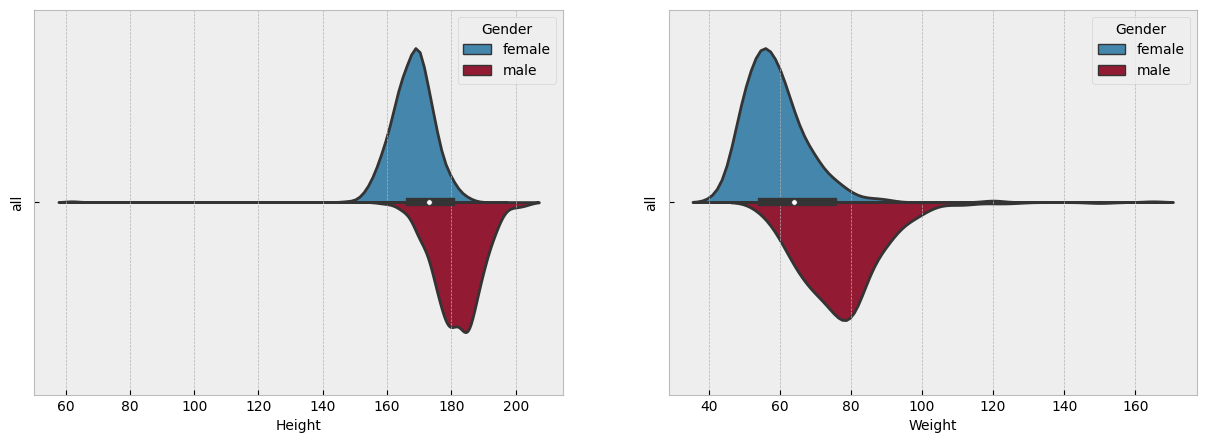

In [18]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
var_of_interest = 'Gender'
df["all"] = ""
sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=df, split=True, ax = ax[0]);
data = df.dropna(subset=['Weight'])
sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=df, split=True, ax = ax[1]);

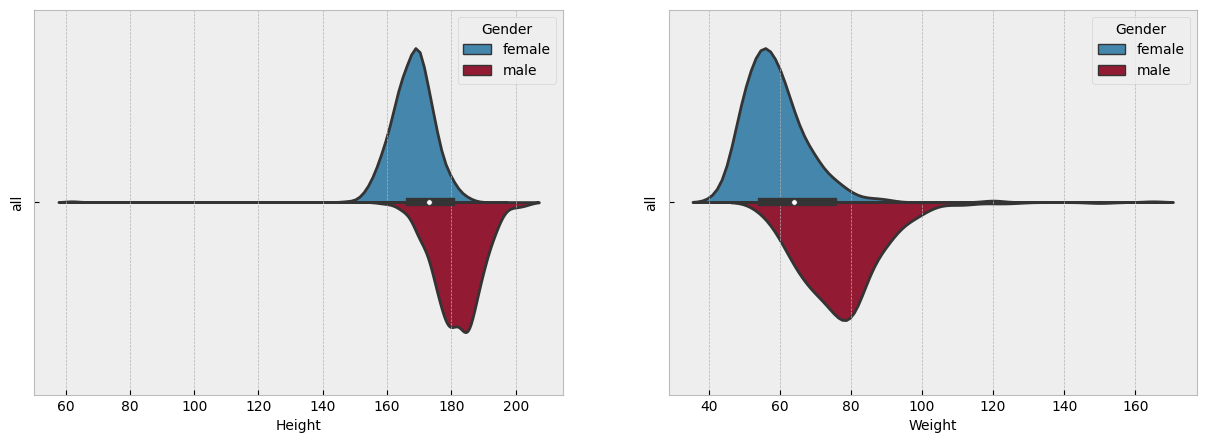

In [24]:
df['Smoking'] = pd.to_numeric(df[('Smoking')])

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
var_of_interest = 'Gender'
df["all"] = ""
sns.violinplot(x='Height', y = "all", hue=var_of_interest, data=df, split=True, ax = ax[0]);
data = df.dropna(subset=['Weight'])
sns.violinplot(x='Weight', y = "all", hue=var_of_interest, data=df, split=True, ax = ax[1]);

Podemos ver, como era de esperar que los hombres son, por lo general, más altos y pesados que las mujeres

C:\Users\slopezgu\AppData\Local\Temp\ipykernel_4756\1793771282.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.displot(data=df, x='Age', hue=variable_interes,kind="kde", fill= True, palette=sns.color_palette('bright')[:3], height=5, aspect=2)


Age mean: 20.43
Age median: 20.00
Age mode: 19.00


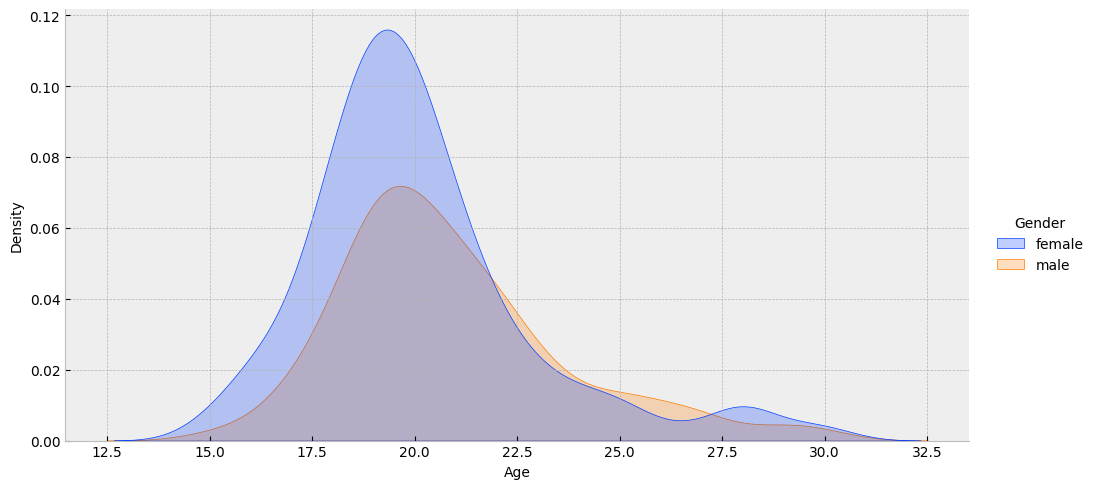

In [40]:
variable_interes = 'Gender'
sns.displot(data=df, x='Age', hue=variable_interes,kind="kde", fill= True, palette=sns.color_palette('bright')[:3], height=5, aspect=2)
print('Age mean: {:.2f}'.format(df.Age.mean()))
print('Age median: {:.2f}'.format(df.Age.median()))
print('Age mode: {:.2f}'.format(st.mode(df.Age)))

In [ ]:
demo_col2 = ['Number of siblings', 'Left - right handed', 'Education', 'Only child', 'Village - town', 'House - block of flats']
for column in df[demo_col2]:
    display(pd.crosstab(index=df[column], columns="% observations", normalize="columns"))


Let´s check the distribution!

In [ ]:
df['Smoking'] = pd.Categorical(df[('Smoking')])
sns.countplot(x= 'Smoking',data=df, hue=variable_interes)
plt.show()

print('Male smoking habits')
dfmale['Smoking'].value_counts() / len(dfmale)

In [ ]:
print('Girls smoking habits')
dfFem['Smoking'].value_counts() / len(dfFem)


In [ ]:
df['Alcohol'] = pd.Categorical(df[('Alcohol')])
sns.countplot(x= 'Alcohol',data=df, hue = 'Gender')
plt.show()

print('Boys drinking habits')
dfmale['Alcohol'].value_counts() / len(dfmale)


In [ ]:
print('Girls alcohol habits')
dfFem['Alcohol'].value_counts() / len(dfFem)


**There is a significative greater ammount of boys that drink a lot!**

Convertimos las categorías en valores numéricos

In [ ]:
df['Smoking'].replace(['never smoked', 'tried smoking', 'former smoker', 'current smoker'],
                        [0, 1, 2, 3], inplace=True)
df['Alcohol'].replace(['never', 'social drinker', 'drink a lot'],
                        [0, 1, 2], inplace=True)
df['Smoking'] = pd.to_numeric(df[('Smoking')])
df['Alcohol'] = pd.to_numeric(df[('Alcohol')])


I am not sure if this is longer useful

In [ ]:
df[music_col].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
plt.show()
plt.show()

In [ ]:
df[hobbies_col].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
plt.show()

In [ ]:
df[phobias_col].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
plt.show()

In [ ]:
df[personality_col1].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
df[personality_col2].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
df[personality_col3].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
df[personality_col4].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
df[personality_col5].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)
plt.show()

In [ ]:
df[spending_col].hist(bins=30, sharey=True, figsize=(15, 10), xlabelsize=0)

plt.show() 

In [ ]:
df[demo_col].hist(bins=30, sharey=True, figsize=(15, 10))

plt.show() 